# Predicting Earthquake Damage in Nepal: A Comparative Analysis Using Logistic Regression and Decision Trees

In [308]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


# Set the style for matplotlib plots
plt.style.use('dark_background')
%matplotlib inline

In [224]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("E:\hopfully a career\WorldQuant\Proj 4\csv_building_structure.csv", low_memory=False)

# Display the first few rows of the DataFrame to get an overview of the data
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [225]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(762106, 31)

> The DataFrame contains 762,106 rows and 31 columns.

In [226]:
# Display concise summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

In [227]:
# Check for missing values in each column and sum them up
df.isnull().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

- After careful consideration, it was observed that only 12 values were missing in two columns.
- Given the large size of the dataset (759,000 rows), the decision was made to drop these 12 values, ensuring minimal impact on the overall dataset.

In [228]:
# Drop rows with missing values from the DataFrame
df.dropna(inplace=True)

In [229]:
# Check the total number of missing values in the DataFrame after handling missing values
df.isnull().sum().sum()

0

- The data is now considered clean and ready for further analysis and modeling.

In [230]:
# Display the counts of each unique value in the 'damage_grade' column
df['damage_grade'].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

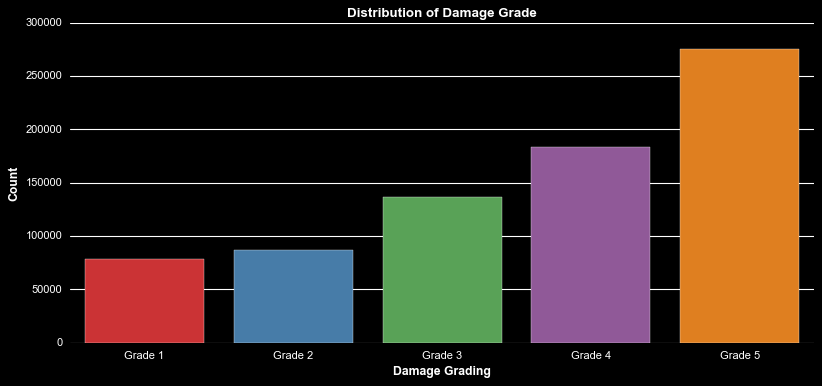

In [231]:
# Create a figure and set its size
plt.figure(figsize=(12, 5))

# Define a custom color palette for each damage grade
custom_palette = sns.color_palette("Set1", n_colors=5)

# Create the countplot with custom colors
ax = sns.countplot(x='damage_grade', data=df, order=['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'], palette=custom_palette)

# Set bold title and labels
plt.title("Distribution of Damage Grade", fontweight='bold')
plt.xlabel("Damage Grading", fontweight='bold')
plt.ylabel("Count", fontweight='bold')

# Display the plot
plt.show()

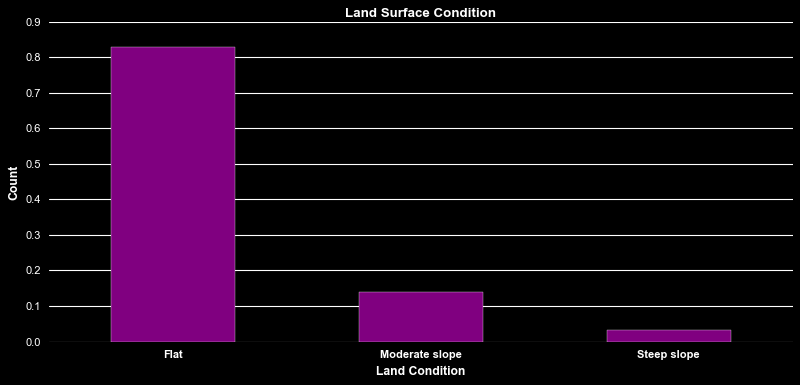

In [232]:
# Create a plot for land surface condition
plt.figure(figsize=(12, 5))
ax = df['land_surface_condition'].value_counts(normalize=True).plot(kind="bar", color="purple", edgecolor="white")

# Set bold title and labels
plt.title("Land Surface Condition", fontweight='bold')
plt.xlabel("Land Condition", fontweight='bold')
plt.ylabel("Count", fontweight='bold')

# Remove top and right spines to clear gridlines
ax.xaxis.grid(False)

# Make x-axis labels bold and more visible
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontweight='bold')

# Display the plot
plt.show()

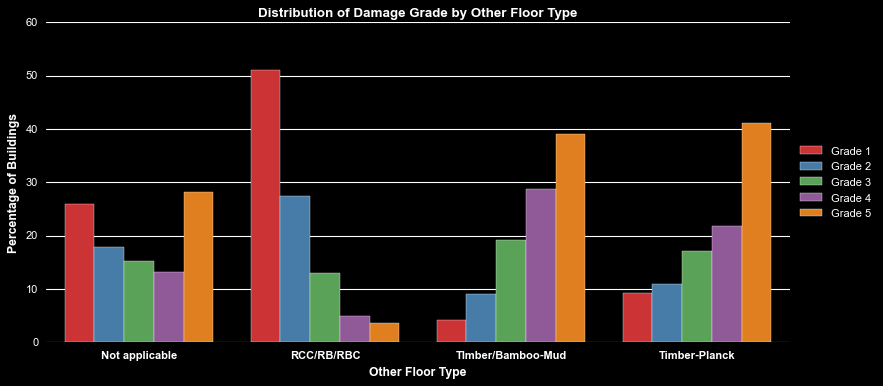

In [233]:
# Calculate counts
df_temp = df.groupby(['other_floor_type', 'damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['other_floor_type', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Define a custom color palette for each damage grade
custom_palette = sns.color_palette("Set1", n_colors=5)

# Plot chart
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=df_temp, 
                 x='other_floor_type', 
                 y='count', 
                 hue='damage_grade',
                palette=custom_palette)
plt.xticks(rotation=0,fontweight='bold')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Other Floor Type", fontweight='bold')
plt.xlabel("Other Floor Type", fontweight='bold')
plt.ylabel("Percentage of Buildings", fontweight='bold')
plt.show()

In [234]:
# Extract the numeric part from the 'damage_grade' column and convert it to integers
df['damage_grade'] = df['damage_grade'].str[-1].astype(int)

# Display the first few rows of the DataFrame after the transformation
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,1,Minor repair


### **Transforming "damage_grade" column**

### **For buildings where the "damage_grade" is Grade 4 or above, "severe_damage" should be 1. For all other buildings, severe_damage" should be 0**

In [235]:
# Create a binary column indicating whether 'damage_grade' is greater than 3

(df['damage_grade']>3).astype(int).head(10)


0    0
1    1
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: damage_grade, dtype: int32

In [236]:
# Create a binary column 'severe_damage' indicating whether 'damage_grade' is greater than 3
df['severe_damage'] = (df['damage_grade'] > 3).astype(int)

# Display the first few rows of the DataFrame after adding the 'severe_damage' column
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,severe_damage
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,1,0,0,0,Damaged-Used in risk,3,Major repair,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,1,0,0,0,Damaged-Repaired and used,5,Reconstruction,1
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,Damaged-Repaired and used,2,Minor repair,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,Damaged-Repaired and used,2,Minor repair,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,Damaged-Repaired and used,1,Minor repair,0


In [237]:
# Count the occurrences of 0,1 values in the 'severe_damage' column

df['severe_damage'].value_counts()

1    459610
0    302484
Name: severe_damage, dtype: int64

### Checking for multicolinearity


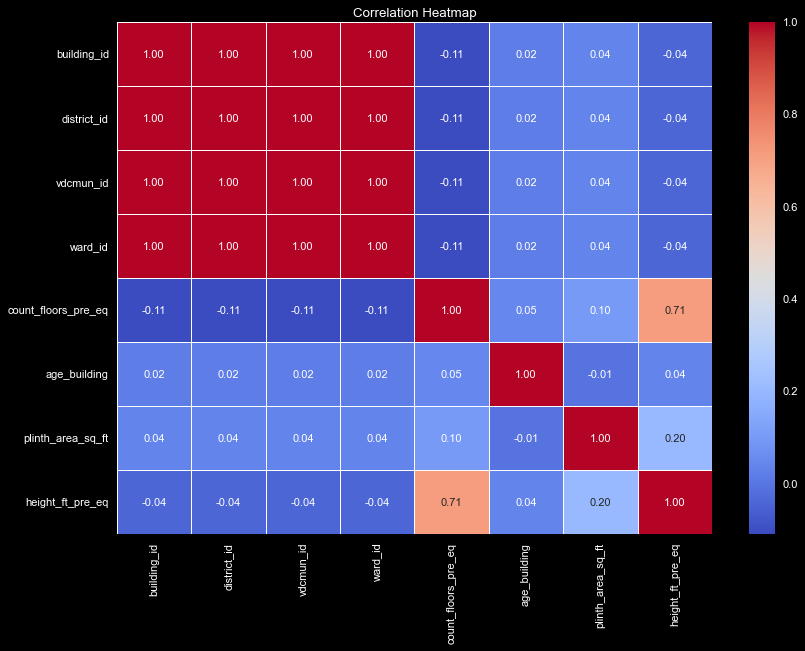

In [238]:
# Plot heatmap of `correlation`
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set plot title
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

- drop multicolinearity columns [height, num of floors] but which one should we drop? the least corr with the target


In [239]:
# Calculate correlation between features and the target variable
corr_with_target = df[['height_ft_pre_eq', 'count_floors_pre_eq', 'severe_damage']].corr()

# Display the correlation matrix
print(corr_with_target)

# Determine which feature has lower correlation with the target
less_correlated_feature = corr_with_target.loc['severe_damage', ['height_ft_pre_eq', 'count_floors_pre_eq']].idxmin()

# Print the result
print(f"The less correlated feature with 'severe_damage' is: {less_correlated_feature}")


                     height_ft_pre_eq  count_floors_pre_eq  severe_damage
height_ft_pre_eq             1.000000             0.711189       0.049114
count_floors_pre_eq          0.711189             1.000000       0.169049
severe_damage                0.049114             0.169049       1.000000
The less correlated feature with 'severe_damage' is: height_ft_pre_eq


In [240]:
# Drop the 'height_ft_pre_eq' column to address multicollinearity
df.drop(columns="height_ft_pre_eq", inplace=True)

# Display the first few rows of the DataFrame after dropping the column
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_post_eq,land_surface_condition,...,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,severe_damage
0,120101000011,12,1207,120703,1,1,9,288,9,Flat,...,0,0,1,0,0,0,Damaged-Used in risk,3,Major repair,0
1,120101000021,12,1207,120703,1,1,15,364,9,Flat,...,0,0,1,0,0,0,Damaged-Repaired and used,5,Reconstruction,1
2,120101000031,12,1207,120703,1,1,20,384,9,Flat,...,0,0,0,0,0,0,Damaged-Repaired and used,2,Minor repair,0
3,120101000041,12,1207,120703,1,1,20,312,9,Flat,...,0,0,0,0,0,0,Damaged-Repaired and used,2,Minor repair,0
4,120101000051,12,1207,120703,1,1,30,308,9,Flat,...,0,0,0,0,0,0,Damaged-Repaired and used,1,Minor repair,0


In [241]:
# List of unused columns to be dropped
columns_to_drop = [
    'damage_grade',
    'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone',
    'has_superstructure_stone_flag',
    'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber',
    'has_superstructure_bamboo',
    'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered',
    'has_superstructure_other',
    'technical_solution_proposed',
    'count_floors_post_eq',
    'condition_post_eq',
    'height_ft_post_eq',
    'building_id',
    'district_id',
    'vdcmun_id',
    'ward_id'
]

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the DataFrame after dropping columns
df.head()


,count_floors_pre_eq,age_building,plinth_area_sq_ft,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,severe_damage
0,1,9,288,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0
1,1,15,364,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,1
2,1,20,384,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0
3,1,20,312,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0
4,1,30,308,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0


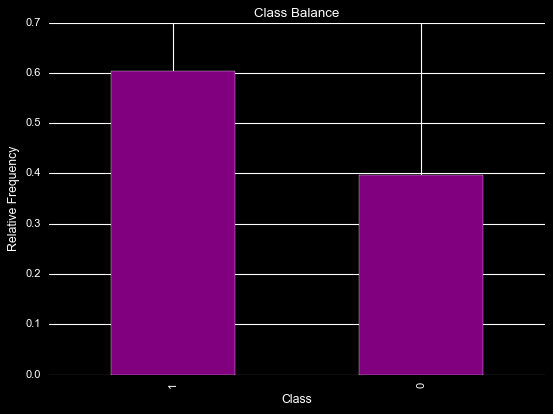

In [242]:
# Define a custom color palette for each damage grade
custom_palette = sns.color_palette("Set1", n_colors=2)

# Plot value counts of `"severe_damage"`
df['severe_damage'].value_counts(normalize=True).plot(
    kind='bar', xlabel="Class", ylabel="Relative Frequency", title='Class Balance', color= 'purple'
);

In [243]:
# Calculate the proportion of each class in the 'severe_damage' column
majority_class_prop, minority_class_prop = df['severe_damage'].value_counts(normalize=True)

# Display the proportions
print(f"Proportion of Majority Class (0): {majority_class_prop:.2%}")
print(f"Proportion of Minority Class (1): {minority_class_prop:.2%}")

Proportion of Majority Class (0): 60.31%
Proportion of Minority Class (1): 39.69%


In [244]:
# Create a pivot table to analyze the relationship between 'foundation_type' and mean 'severe_damage'
foundation_pivot = pd.pivot_table(
    df, index='foundation_type', values="severe_damage", aggfunc=np.mean
).sort_values(by='severe_damage')

# Display the pivot table
foundation_pivot

,severe_damage
foundation_type,
RC,0.038263
Bamboo/Timber,0.237855
Cement-Stone/Brick,0.296904
Other,0.510545
Mud mortar-Stone/Brick,0.685115


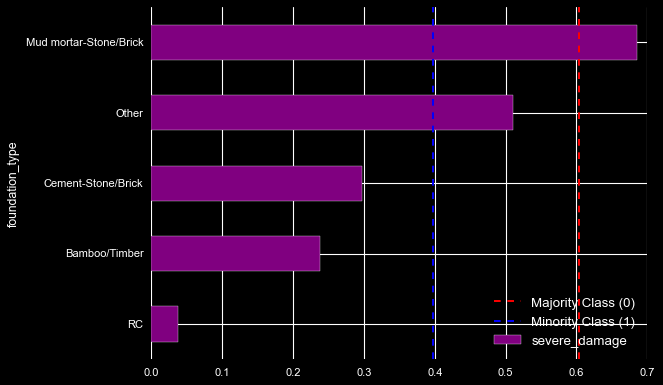

In [245]:
# Plot a horizontal bar chart of `foundation_pivot`
foundation_pivot.plot(kind='barh', legend=None, color="purple")

# Add vertical lines for class proportions
plt.axvline(majority_class_prop, linestyle="--", color="red", label="Majority Class (0)")
plt.axvline(minority_class_prop, linestyle="--", color="blue", label="Minority Class (1)")

# Display legend in the lower right corner
plt.legend(loc="lower right", fontsize='large')

# Display the plot
plt.show()

In [246]:
# Check for high- and low-cardinality categorical features
df.select_dtypes("object").nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
dtype: int64

In [247]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Check cardinality for each categorical column
for column in categorical_columns:
    cardinality = df[column].nunique()
    print(f"{column}: {cardinality} unique values")

# Identify features with low cardinality (e.g., less than a threshold)
low_cardinality_features = [column for column in categorical_columns if df[column].nunique() <= 3]

# Identify features with high cardinality (e.g., greater than a threshold)
high_cardinality_features = [column for column in categorical_columns if df[column].nunique() > 3]

# Display results
print("\nFeatures with Low Cardinality:")
print(low_cardinality_features)

print("\nFeatures with High Cardinality:")
print(high_cardinality_features)

land_surface_condition: 3 unique values
foundation_type: 5 unique values
roof_type: 3 unique values
ground_floor_type: 5 unique values
other_floor_type: 4 unique values
position: 4 unique values
plan_configuration: 10 unique values

Features with Low Cardinality:
['land_surface_condition', 'roof_type']

Features with High Cardinality:
['foundation_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration']


In [249]:
df.head()

,count_floors_pre_eq,age_building,plinth_area_sq_ft,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,severe_damage
0,1,9,288,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0
1,1,15,364,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,1
2,1,20,384,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0
3,1,20,312,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0
4,1,30,308,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0


### First -- Logistic Regression

In [250]:
# Define the target variable
target = "severe_damage"

# Separate features (X) and target variable (y)
X = df.drop(columns=target)
y = df[target]

In [251]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (609675, 10)
y_train shape: (609675,)
X_test shape: (152419, 10)
y_test shape: (152419,)


In [252]:
# Calculate the baseline accuracy score (accuracy of predicting the majority class)
baseline_accuracy = y_train.value_counts(normalize=True).max()

# Display the baseline accuracy score
print(f"Baseline Accuracy Score: {baseline_accuracy:.2%}")


Baseline Accuracy Score: 60.35%


In [253]:
# Calculate the baseline accuracy score (accuracy of predicting the majority class)
acc_baseline = y_train.value_counts(normalize=True).max()

# Display the baseline accuracy score rounded to two decimal places
print("Baseline Accuracy:", round(acc_baseline, 2))


Baseline Accuracy: 0.6


In [301]:
# Build a machine learning pipeline
model_reg = make_pipeline(
    OneHotEncoder(use_cat_names=True),  # One-hot encode categorical features
    LogisticRegression(max_iter=1000)   # Logistic Regression classifier
)

# Fit the model to the training data
model_reg.fit(X_train, y_train)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [302]:
# Calculate training accuracy
acc_train = accuracy_score(y_train, model_reg.predict(X_train))

# Calculate test accuracy
acc_test = model_reg.score(X_test, y_test)

# Display training and test accuracies rounded to two decimal places
print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))


Training Accuracy: 0.72
Test Accuracy: 0.72


In [303]:
# Get feature names after one-hot encoding
features = model_reg.named_steps['onehotencoder'].get_feature_names_out()

# Get importances (coefficients) from the logistic regression model
importances = model_reg.named_steps['logisticregression'].coef_[0]


In [304]:
# Calculate odds ratios from the logistic regression model coefficients
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()

# Display the first few odds ratios
odds_ratios.head()


ground_floor_type_RC             0.294482
roof_type_RCC/RB/RBC             0.358158
foundation_type_Bamboo/Timber    0.371072
foundation_type_RC               0.453103
other_floor_type_RCC/RB/RBC      0.499674
dtype: float64

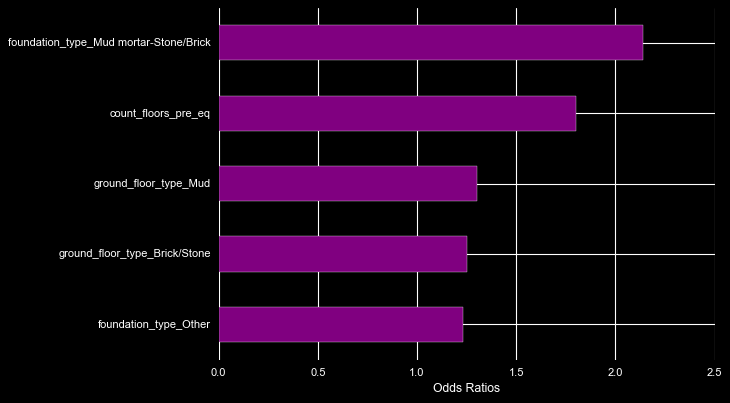

In [305]:
# Create a horizontal bar chart of the five largest odds ratios
odds_ratios.tail().plot(kind='barh', color="purple")

# Label the x-axis
plt.xlabel("Odds Ratios")

# Display the plot
plt.show()


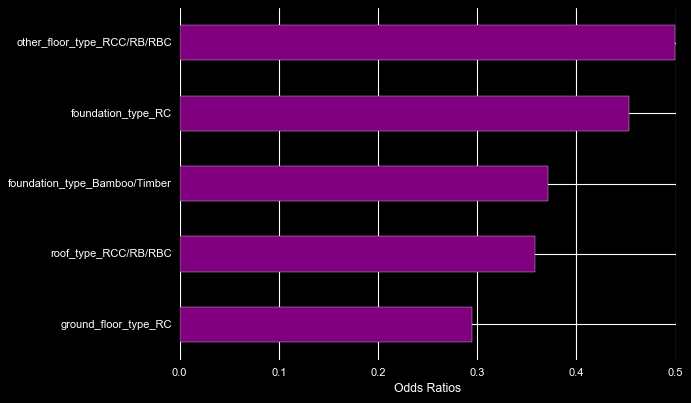

In [306]:
# Create a horizontal bar chart of the five smallest odds ratios
odds_ratios.head().plot(kind='barh', color="purple")

# Label the x-axis
plt.xlabel("Odds Ratios")

# Display the plot
plt.show()


### Second -- Dicision Tree


In [262]:
# Split the training set into training and validation sets for the decision tree
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Display the shapes of the resulting sets
print("Updated X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


Updated X_train shape: (487740, 10)
X_val shape: (121935, 10)
y_train shape: (487740,)
y_val shape: (121935,)


In [298]:
# Build a machine learning pipeline for Decision Tree
model = make_pipeline(
    OrdinalEncoder(),                    # Ordinal encode categorical features
    DecisionTreeClassifier(random_state=42)  # Decision Tree classifier
)

# Fit the model to the training data
model.fit(X_train, y_train)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Moderate slope    2
Steep slope       3
NaN              -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'data_type': dtype('O'...
                                          'data_type': dtype('O'),
                                          'mapping': Not attached       1
Attached-1 side    2
Attached-2 side    3
Attached-3 side    4
NaN               -2
dtype: int64},
             

In [299]:
# Calculate training accuracy
acc_train = accuracy_score(y_train, model.predict(X_train))

# Calculate validation accuracy
acc_val = model.score(X_val, y_val)

# Display training and validation accuracies rounded to two decimal places
print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))


Training Accuracy: 0.86
Validation Accuracy: 0.65


In [300]:
# Get the depth of the decision tree
tree_depth = model.named_steps['decisiontreeclassifier'].get_depth()

# Display the tree depth
print("Tree Depth:", tree_depth)


Tree Depth: 67


In [266]:
# Define a range of `max_depth` hyperparameters
depth_hyperparams = range(1, 50, 2)

# Lists to store training and validation accuracy scores
training_acc = []
validation_acc = []

# Loop through different `max_depth` values
for d in depth_hyperparams:
    # Create a model with `max_depth` set to `d`
    test_model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    
    # Fit the model to the training data
    test_model.fit(X_train, y_train)
    
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    
    # Calculate validation accuracy score and append to `validation_acc`
    validation_acc.append(test_model.score(X_val, y_val))

# Display the first three training and validation accuracy scores
print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])


Training Accuracy Scores: [0.6774121458153934, 0.7146922540697913, 0.7207549104030836]
Validation Accuracy Scores: [0.6773608889982368, 0.713593307909952, 0.7190142288924427]


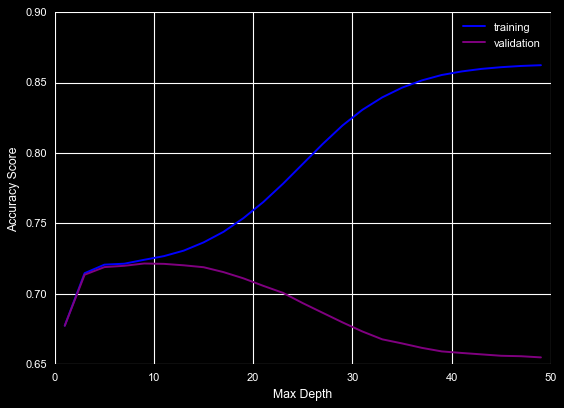

In [269]:
# Plot training and validation accuracy scores
plt.plot(depth_hyperparams, training_acc, label="training", color='blue')
plt.plot(depth_hyperparams, validation_acc, label="validation", color='purple')

# Label x-axis and y-axis
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


In [270]:
# Build a machine learning pipeline for Decision Tree with chosen max_depth
model = make_pipeline(
    OrdinalEncoder(),                       # Ordinal encode categorical features
    DecisionTreeClassifier(max_depth=9, random_state=42)  # Decision Tree classifier with specified max_depth
)

# Fit the model to the training data
model.fit(X_train, y_train)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Moderate slope    2
Steep slope       3
NaN              -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'data_type': dtype('O'...
                                          'mapping': Not attached       1
Attached-1 side    2
Attached-2 side    3
Attached-3 side    4
NaN               -2
dtype: int64},
                                         {'col': 'plan_configuration',
         

In [272]:
# Calculate training accuracy
acc_train = accuracy_score(y_train, model.predict(X_train))

# Calculate validation accuracy
acc_val = model.score(X_val, y_val)

# Display training and validation accuracies rounded to two decimal places
print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))


Training Accuracy: 0.72
Validation Accuracy: 0.72


In [273]:
# Calculate test accuracy
test_acc = model.score(X_test, y_test)

# Display the test accuracy rounded to two decimal places
print("Test Accuracy:", round(test_acc, 2))


Test Accuracy: 0.72


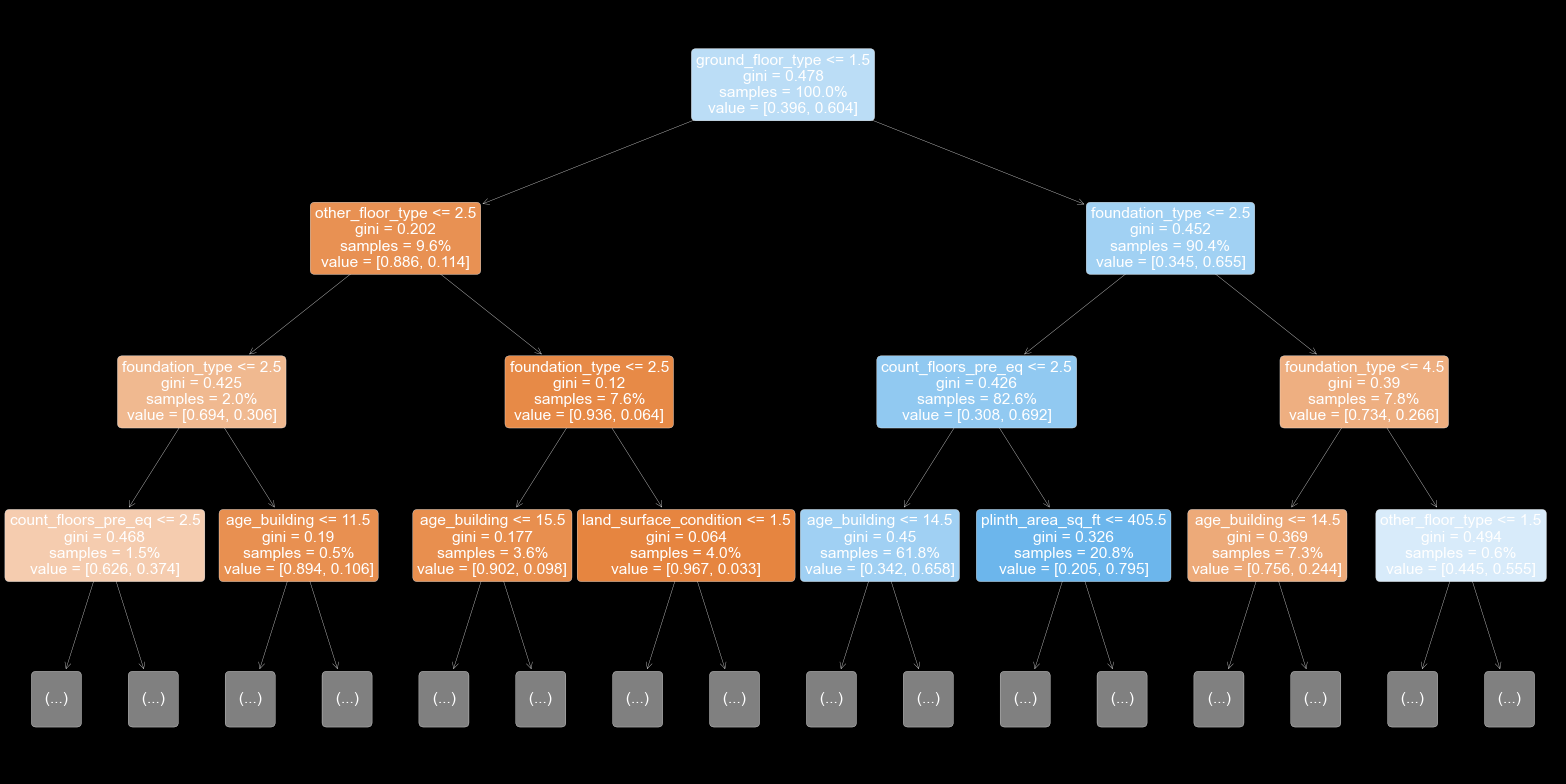

In [284]:
# Create a larger figure
fig, ax = plt.subplots(figsize=(25, 12))

# Plot the decision tree
plot_tree(
    decision_tree=model.named_steps['decisiontreeclassifier'],  # Decision tree model
    feature_names=X_train.columns,  # Feature names
    filled=True,  # Color leaf nodes with class colors
    rounded=True,  # Round leaf node edges
    proportion=True,  # Display class proportion in leaf nodes
    max_depth=3,  # Only display the first 3 levels of the tree
    fontsize=14,  # Set font size for better readability
    ax=ax  # Place the plot in the specified figure axis
);


In [285]:
# Get the feature names
features = X_train.columns

# Get the feature importances from the decision tree model
importances = model.named_steps['decisiontreeclassifier'].feature_importances_

# Display the first three feature names and their importances
print("Features:", features[:3])
print("Importances:", importances[:3])


Features: Index(['count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft'], dtype='object')
Importances: [0.06286285 0.05099616 0.01595836]


In [286]:
# Create a Pandas Series with feature importances
feat_imp = pd.Series(importances, index=features).sort_values()

# Display the top entries in the feature importances
feat_imp.head()


plan_configuration        0.000956
land_surface_condition    0.005974
position                  0.015419
plinth_area_sq_ft         0.015958
roof_type                 0.016928
dtype: float64

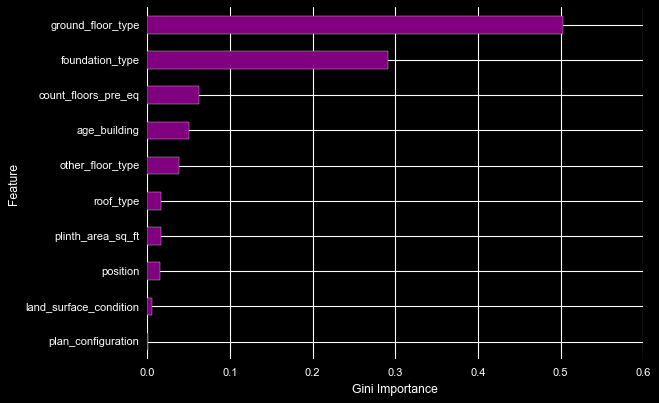

In [288]:
# Create a horizontal bar chart of feature importances
feat_imp.plot(kind="barh", color="purple")

# Label x-axis and y-axis
plt.xlabel("Gini Importance")
plt.ylabel("Feature")

# Display the plot
plt.show()


### Model Comparison: Decision Tree vs. Logistic Regression

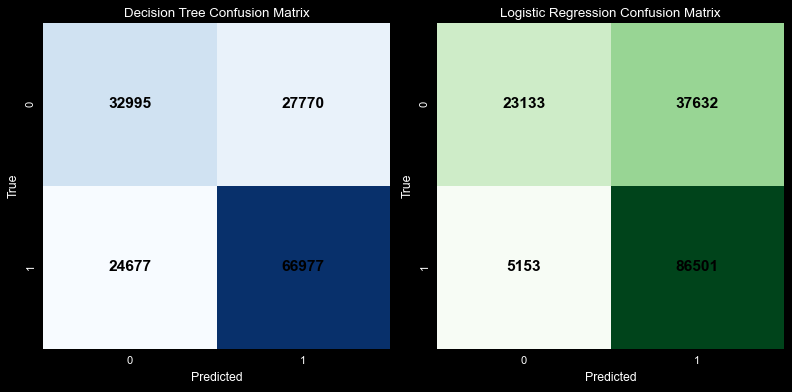

In [313]:
# Decision Tree
conf_matrix_tree = confusion_matrix(y_test, model.predict(X_test))

# Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, model_reg.predict(X_test))  # Replace model_logreg with your Logistic Regression model

# Set up a custom annotation style for better visibility
annot_kws = {"fontsize": 14, "fontweight": "bold", "color": 'black'}

# Plotting Decision Tree Confusion Matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws=annot_kws)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plotting Logistic Regression Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Greens', cbar=False, annot_kws=annot_kws)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

- **The Decision Tree model appears to have a better balance between precision and recall, making fewer false positive predictions while capturing a substantial number of true positives.**
- **The Logistic Regression model excels in reducing false negatives, making it more cautious about predicting positive instances. However, it has a higher number of false positives.**

### Summary:
- **If minimizing false positives (incorrectly predicting damage when there is none) is a priority, the Decision Tree might be a better choice.**
- **If minimizing false negatives (missing instances of actual damage) is crucial, the Logistic Regression model is more effective.**
- **Consider the specific goals and requirements of your application when choosing between the models.**